In [2]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from ipynb.fs.full.ActivityIndex import CurveFit
from sklearn.cluster import KMeans
from phenom.analysis import *

In [3]:
path1 = '/home/kkrishnan/SBRG/OmnilogDB/Data/Irina-YTF/Metadata'
path2 = '/home/kkrishnan/SBRG/OmnilogDB/Data/Irina-YTF/Data'

onlyfiles = [f for f in listdir(path1) if isfile(join(path1, f))]

temp_data = pd.read_excel(path1+'/'+onlyfiles[0])
temp_data_2 = pd.read_excel(path1+'/'+onlyfiles[1])

metadata = pd.concat([temp_data,temp_data_2],ignore_index=True)

for i in range(2,len(onlyfiles)):
    temp_data = pd.read_excel(path1+'/'+onlyfiles[i])
    metadata = pd.concat([metadata,temp_data],ignore_index=True)

strains = metadata['Strain name'].unique().tolist()
species = metadata['Species'].unique().tolist()


plates = metadata['PM Type (PM1 or PM2, or PM3, or PM4...)'].tolist()

for i in range(0,len(plates)):
    plates[i]=plates[i][0:2]+'0'+plates[i][2:]
    
metadata['PM Type (PM1 or PM2, or PM3, or PM4...)'] = plates

In [4]:
## Create plate data type for each plate used

def PM_datatype(plate,strain):
    path1 = '/home/kkrishnan/SBRG/OmnilogDB/Data/Irina-YTF/Curated Data'
    onlyfiles = [f for f in listdir(path1) if isfile(join(path1, f))]
    strain_files = []
    pm_datatype = []
    for file in onlyfiles:
        if(strain in file):
            strain_files.append(file)
            
    for file in strain_files:
        temp_data = pd.read_csv(path1+'/'+file)        
        for temp_plate in temp_data['Plate Type'].unique():
            print(temp_plate)
            if(plate in temp_plate):
                pm_datatype.append(temp_data)
            
    return pm_datatype


In [5]:
plates = metadata['PM Type (PM1 or PM2, or PM3, or PM4...)'].unique().tolist()
strains = metadata['Strain name'].unique().tolist()

eg_data = PM_datatype(plates[1],strains[0])
exp_data = PM_datatype(plates[1],strains[1])


PM01
PM07
PM05
PM03B
PM03B
PM07
PM02A
PM02A
PM05
PM01
PM07
PM03B
PM02A
PM03B
PM05
PM02A
PM01
PM05
PM07
PM01


In [6]:
#CurveFit(np.array(eg_data[0]['Hour'].tolist()),np.array(eg_data[0]['A01'].tolist()))

In [7]:
strains

['BW25113',
 'ybaO',
 'ybeF',
 'ycaN',
 'yeeY',
 'yhjC',
 'yiaG',
 'yidZ',
 'ynfL',
 'yneJ',
 'yahB']

In [8]:
metadata.columns

Index(['Number', 'Date (2022-02-23)',
       'Project name (SBRG or your own project)', 'Researcher', 'Species',
       'Strain name', 'WT or KO (if KO strain, please add the gene name)',
       'Condition (Medium)', 'Temp (37 or 30)', 'Replicate (R1 or R2)',
       'PM Type (PM1 or PM2, or PM3, or PM4...)',
       'folder (AWS cloud folder if we transfer the data to AWS)',
       'Number of Omnilog Shelf'],
      dtype='object')

In [9]:
data = eg_data[1].iloc[:,8:]
data2 = exp_data[1].iloc[:,8:]

In [10]:
def plot_well_in_plate_for_strain(strain_name,strain_list,well):

    plt.figure()
    i = 1
    for rep in strain_list:
        plt.plot(rep['Hour'],rep[plate])
        plt.title(well+''+','+' '+strain_name)
        plt.ylabel('Respiration')
        plt.xlabel('hours')
        i = i+1
    plt.legend(['R1','R2'])

    

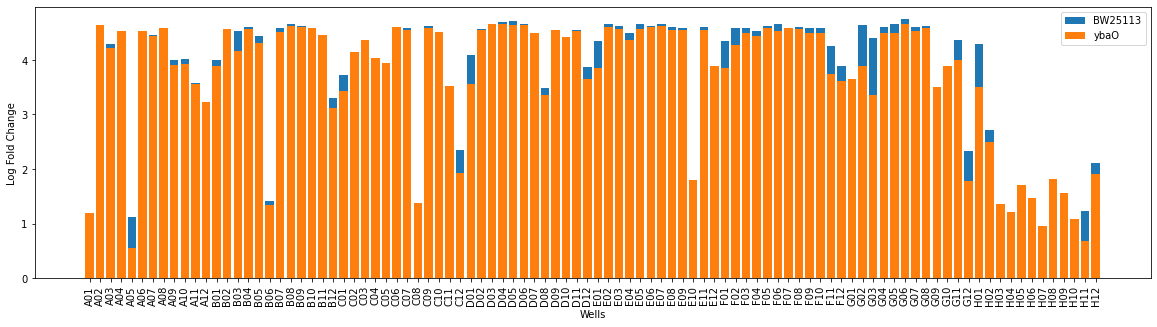

In [11]:
out = calc_plate_fc(data,'PM07')
out2 = calc_plate_fc(data2,'PM07')
plt.figure(figsize=(20,5))
plt.bar(out['well'],out['log2FC'])
plt.bar(out2['well'],out2['log2FC'])
plt.xticks(rotation=90);
plt.ylabel('Log Fold Change')
plt.xlabel('Wells')
plt.legend([strains[0],strains[1]])

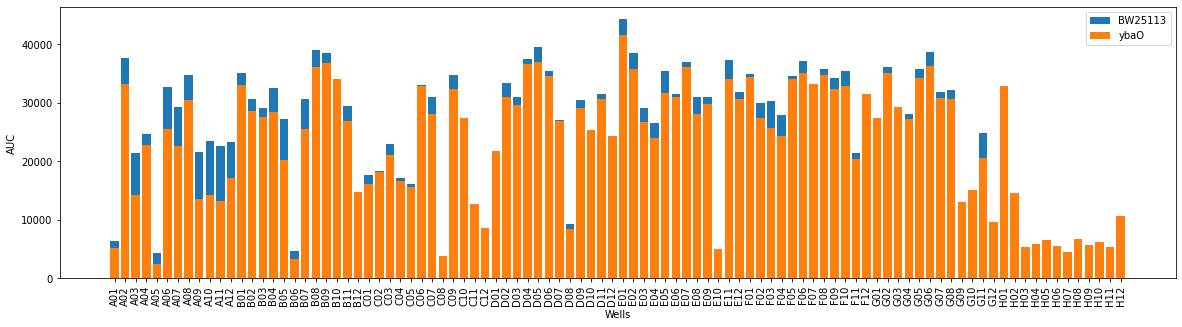

In [12]:
out = calc_plate_auc(data,'PM07')
out2 = calc_plate_auc(data2,'PM07')
plt.figure(figsize=(20,5))
plt.bar(out['well'],out['auc'])
plt.bar(out2['well'],out2['auc'])
plt.xticks(rotation=90);
plt.ylabel('AUC')
plt.xlabel('Wells')
plt.legend([strains[0],strains[1]])

/home/kkrishnan/SBRG/OmnilogDB/BiologDB/phenom/analysis.py:470: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-np.exp(b-c*time))
/home/kkrishnan/SBRG/OmnilogDB/BiologDB/phenom/analysis.py:473: RuntimeWarning: invalid value encountered in power
  return a + (b-a)/(1+c*np.exp(-d*time))**(1/e)
/home/kkrishnan/SBRG/OmnilogDB/BiologDB/phenom/analysis.py:476: RuntimeWarning: overflow encountered in exp
  return a/(1+np.exp(-b*(time-c)))
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


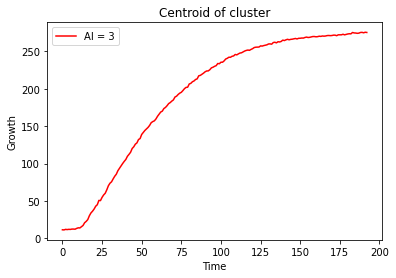

In [13]:
temp = calc_plate_kinetics(eg_data[1],'PM05')
out = calc_activity_index(temp,'PM05',4)
AI1 = out[out['Activity Index']==3].index.tolist()
avg = 0
for i in AI1:
    avg = avg + eg_data[1][i]
avg = avg/len(AI1)
plt.plot(avg,'r')
plt.ylabel('Growth')
plt.xlabel('Time')
plt.title('Centroid of cluster')
plt.legend(['AI = 3'])

In [14]:
out = growth_correlation_map(data.iloc[:,1:],'PM03')
out


,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
A01,1.000000,0.922980,0.818701,0.843454,0.849098,0.905427,0.891800,0.922886,0.867687,0.880685,...,-0.163897,0.730946,0.810277,0.425267,0.401303,0.813989,0.731305,0.228483,0.786001,0.776452
A02,0.922980,1.000000,0.900443,0.931884,0.890798,0.981028,0.974525,0.998128,0.953354,0.962998,...,-0.246094,0.788561,0.873273,0.460605,0.395389,0.896943,0.792565,0.143260,0.844788,0.822091
A03,0.818701,0.900443,1.000000,0.993979,0.787053,0.960853,0.973044,0.918098,0.986735,0.982403,...,-0.186787,0.861516,0.921894,0.629246,0.458075,0.956938,0.900845,0.076075,0.833560,0.945743
A04,0.843454,0.931884,0.993979,1.000000,0.812437,0.974892,0.986786,0.944707,0.996103,0.992451,...,-0.226132,0.862116,0.933058,0.595733,0.450430,0.965885,0.895439,0.050175,0.843733,0.920417
A05,0.849098,0.890798,0.787053,0.812437,1.000000,0.871971,0.859744,0.888427,0.835530,0.847207,...,-0.097767,0.699504,0.767750,0.405856,0.370290,0.785348,0.681128,0.231344,0.787535,0.741018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H08,0.813989,0.896943,0.956938,0.965885,0.785348,0.931468,0.946493,0.906505,0.963586,0.956672,...,-0.242511,0.849767,0.918750,0.605097,0.476683,1.000000,0.890741,-0.014562,0.820859,0.888136
H09,0.731305,0.792565,0.900845,0.895439,0.681128,0.848782,0.864121,0.809173,0.890342,0.882678,...,-0.162032,0.787325,0.869175,0.636088,0.472369,0.890741,1.000000,0.050398,0.768196,0.872385
H10,0.228483,0.143260,0.076075,0.050175,0.231344,0.158299,0.113274,0.160430,0.076960,0.101326,...,0.203156,0.053146,0.003884,0.100027,0.047158,-0.014562,0.050398,1.000000,0.155658,0.214392
H11,0.786001,0.844788,0.833560,0.843733,0.787535,0.858116,0.857677,0.852184,0.857114,0.860960,...,-0.149436,0.783203,0.799440,0.530033,0.425326,0.820859,0.768196,0.155658,1.000000,0.811937


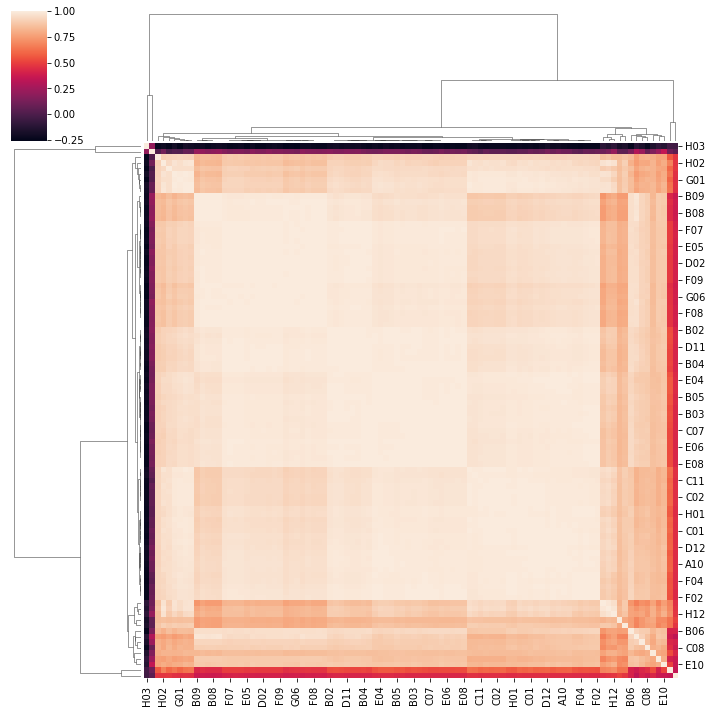

In [15]:
import seaborn as sns
sns.clustermap(out)